# Proyek Analisis Data : E-commerce Public Dataset

* Dataset Dicoding : [E-commerce Public Datast](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing)
* Nama : Windu Handaru Kilat
* Email : winduhandrk@gmail.com
* Id Dicoding : winduhndr

# Menentukan Pertanyaan Bisnis

1. Bagaimana tingkat nilai transaksi customer dari waktu ke waktu? <span style="background-color:yellow">🚩</span>
1. Jenis produk apa yang sering dibeli customer? <span style="background-color:green">🚩</span>
1. Apakah produk dengan rating yang lebih rendah (1-3) cenderung memiliki jumlah pesanan yang dibatalkan lebih tinggi? <span style="background-color:blue">🚩</span>

## Menyiapkan semua library yang dibutuhkan

---


Melakukan proses instalasi dan mengimport kebutuhan library

In [54]:
import os
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import chi2_contingency

## ⚫ **Data Wrangling**

* ###  **Gathering Data**

<span style="background-color:yellow">🚩</span> Import file local dengan dataset `order_payments_dataset` & `orders_dataset`

In [55]:
# Mengimpor file dari direktori local
file_path1_1 = os.path.join('02_E-Commerce_Public_Dataset', 'order_payments_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df1_1 = pd.read_csv(file_path1_1)

# Menampilkan data frame 5 teratas
df1_1.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [56]:
# Mengimpor file dari direktori local
file_path1_2 = os.path.join('02_E-Commerce_Public_Dataset', 'orders_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df1_2 = pd.read_csv(file_path1_2)

# Menampilkan data frame 5 teratas
df1_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [57]:
# Joining dataset `order_payments_dataset` & `orders_dataset`
## Joining dataset
yellow_df = pd.merge(
    left=df1_1,
    right=df1_2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

## Menentukan kolom yang dipilih
trx_df = yellow_df[
    ['order_id', 
    'payment_value',
    'order_status',
    'order_purchase_timestamp']
    ]

## Menampilkan data frame 5 teratas
trx_df.head()

,order_id,payment_value,order_status,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,delivered,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,delivered,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,delivered,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,107.78,delivered,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,128.45,delivered,2018-05-21 13:59:17


<span style="background-color:green">🚩</span> Import file local dengan dataset `order_items_dataset`, `orders_dataset` & `products_dataset`

In [58]:
# Mengimpor file dari direktori local
file_path2_1 = os.path.join('02_E-Commerce_Public_Dataset', 'order_items_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df2_1 = pd.read_csv(file_path2_1)

# Menampilkan data frame 5 teratas
df2_1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [59]:
# Mengimpor file dari direktori local
file_path2_2 = os.path.join('02_E-Commerce_Public_Dataset', 'orders_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df2_2 = pd.read_csv(file_path2_2)

# Menampilkan data frame 5 teratas
df2_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
# Mengimpor file dari direktori local
file_path2_3 = os.path.join('02_E-Commerce_Public_Dataset', 'products_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df2_3 = pd.read_csv(file_path2_3)

# Menampilkan data frame 5 teratas
df2_3.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [61]:
# Joining Dataset `order_items_dataset`, `orders_dataset` & `products_dataset`
## Joining dataset 1 
green_df = pd.merge(
    left=df2_1,
    right=df2_2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

## Menentukan kolom yang dipilih 1
product_raw1 = green_df[
    ['order_id', 
    'product_id',
    'order_status']
    ]

## Joining dataset 2
product_raw2 = pd.merge(
    left=product_raw1,
    right=df2_3,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

## Menentukan kolom yang dipilih 1
product_df = product_raw2[
    ['order_id', 
    'product_id',
    'order_status',
    'product_category_name']
    ]

## Menampilkan data frame 5 teratas
product_df.head()

,order_id,product_id,order_status,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,delivered,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,delivered,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,delivered,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,delivered,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,delivered,cool_stuff


<span style="background-color:blue">🚩</span> Import file local dengan dataset `order_reviews_dataset` & `orders_dataset`

In [62]:
# Mengimpor file dari direktori local
file_path3_1 = os.path.join('02_E-Commerce_Public_Dataset', 'order_reviews_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df3_1 = pd.read_csv(file_path3_1)

# Menampilkan data frame 5 teratas
df3_1.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [63]:
# Mengimpor file dari direktori local
file_path3_2 = os.path.join('02_E-Commerce_Public_Dataset', 'orders_dataset.csv')

# Membaca data frame berdasarkan target direktori local dan file yang telah ditentukan
df3_2 = pd.read_csv(file_path3_2)

# Menampilkan data frame 5 teratas
df3_2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [64]:
# Joining dataset `order_reviews_dataset` & `orders_dataset`
## Joining dataset
blue_df = pd.merge(
    left=df3_1,
    right=df3_2,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

## Menentukan kolom yang dipilih
corr_df = blue_df[
    ['order_id', 
    'review_score',
    'order_status']
    ]

## Menampilkan data frame 5 teratas
corr_df.head()

,order_id,review_score,order_status
0,73fc7af87114b39712e6da79b0a377eb,4,delivered
1,a548910a1c6147796b98fdf73dbeba33,5,delivered
2,f9e4b658b201a9f2ecdecbb34bed034b,5,delivered
3,658677c97b385a9be170737859d3511b,5,delivered
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,delivered


* ###  **Assessing Data**

<span style="background-color:yellow">🚩</span> Penilaian kualitas dataset `trx_df`

In [65]:
# Melihat dimensi dataset dalam baris dan kolom
trx_df.shape

(103886, 4)

In [66]:
# Melihat informasi dasar dataframe setiap kolom
trx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103886 non-null  object 
 1   payment_value             103886 non-null  float64
 2   order_status              103886 non-null  object 
 3   order_purchase_timestamp  103886 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


📌 Terdapat tipe data tidak sesuai dengan karakteristik pada kolom order_purchase_timestamp

In [67]:
# Memeriksa duplikasi/nilai yang sama pada kolom
print("Duplikasi: ", trx_df.duplicated().sum())

Duplikasi:  615


📌 Terdapat data duplikasi sebanyak 615

In [68]:
# Melihat statistika deskriptif data
trx_df.describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


<span style="background-color:green">🚩</span> Penilaian kualitas dataset `product_df`

In [69]:
# Melihat dimensi dataset dalam baris dan kolom
product_df.shape

(112650, 4)

In [70]:
# Melihat informasi dasar dataframe setiap kolom
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               112650 non-null  object
 1   product_id             112650 non-null  object
 2   order_status           112650 non-null  object
 3   product_category_name  111047 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


📌 Terdapat Missing Value pada atribut product_category_name

In [71]:
# Memeriksa duplikasi/nilai yang sama pada kolom
print("Duplikasi: ", product_df.duplicated().sum())

Duplikasi:  10225


📌 Terdapat data duplikasi sebanyak 10225

In [72]:
# Melihat statistika deskriptif data
product_df.describe()

,order_id,product_id,order_status,product_category_name
count,112650,112650,112650,111047
unique,98666,32951,7,73
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,delivered,cama_mesa_banho
freq,21,527,110197,11115


<span style="background-color:blue">🚩</span> Penilaian kualitas dataset `corr_df`

In [73]:
# Melihat dimensi dataset dalam baris dan kolom
corr_df.shape

(99224, 3)

In [74]:
# Melihat informasi dasar dataframe setiap kolom
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99224 non-null  object
 1   review_score  99224 non-null  int64 
 2   order_status  99224 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [75]:
# Memeriksa duplikasi/nilai yang sama pada kolom
print("Duplikasi: ", corr_df.duplicated().sum())

Duplikasi:  349


📌 Terdapat data duplikasi sebanyak 349

In [76]:
corr_df.isnull().sum()

order_id        0
review_score    0
order_status    0
dtype: int64

In [77]:
# Melihat statistika deskriptif data
product_df.describe()

,order_id,product_id,order_status,product_category_name
count,112650,112650,112650,111047
unique,98666,32951,7,73
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,delivered,cama_mesa_banho
freq,21,527,110197,11115


* ### **Cleaning Data**

<span style="background-color:yellow">🚩</span> Cleaning Data `trx_df`

In [78]:
# Menghilangkan duplikasi data
trx_nd = trx_df.drop_duplicates()

print("Duplikasi: ", trx_nd.duplicated().sum())

Duplikasi:  0


In [79]:
# Menentukan atribut yang akan diubah tipe datanya
datetime_col = ["order_purchase_timestamp"]
# Looping sebanyak jumlah atribut pada variabel bantu datetime_col
for column in datetime_col:
# Mengubah atribut dalam DataFrame trx_nd menjadi tipe data datetime
    trx_nd[column] = pd.to_datetime(trx_nd[column])

c:\Users\USER\Anaconda3\envs\subdicoding\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
trx_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103271 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103271 non-null  object        
 1   payment_value             103271 non-null  float64       
 2   order_status              103271 non-null  object        
 3   order_purchase_timestamp  103271 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.9+ MB


<span style="background-color:green">🚩</span> Cleaning Data `product_df`

In [81]:
# Menampilkan missing value pada attribut product_category_name
product_df[product_df.product_category_name.isna()]


,order_id,product_id,order_status,product_category_name
3296,0046e1d57f4c07c8c92ab26be8c3dfc0,ff6caf9340512b8bf6d2a2a6df032cfa,delivered,NaN
3297,0ca8999f0176e37f35b6e49a9b2569da,ff6caf9340512b8bf6d2a2a6df032cfa,delivered,NaN
3298,0ca8999f0176e37f35b6e49a9b2569da,ff6caf9340512b8bf6d2a2a6df032cfa,delivered,NaN
3301,00482f2670787292280e0a8153d82467,a9c404971d1a5b1cbc2e4070e02731fd,delivered,NaN
3794,004f5d8f238e8908e6864b874eda3391,5a848e4ab52fd5445cdc07aab1c40e48,delivered,NaN
...,...,...,...,...
112507,fe421e7d38d622aedc8ca97d58771ea6,28209b7aed95f7c0c9b9806f974a104e,delivered,NaN
112522,fe7387b4827383e4868b82be1dd12722,41bf6a8c9424d4ec060e39e21883db3f,delivered,NaN
112538,fe97f3949cbc37b9ab48ac5769514cbe,40a1e3c65a0bcf6f4ebba840a8156ba2,delivered,NaN
112542,fea563d194760a0737be8bff36ca8c40,34a4076cd057a823247a5a44e84872d8,delivered,NaN


In [82]:
# Mengubah missing value dengan nilai 'Others'
product_df['product_category_name'].fillna('Others', inplace=True)

c:\Users\USER\Anaconda3\envs\subdicoding\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [83]:
# Menampilkan jumlah missing value
product_df.isna().sum()

order_id                 0
product_id               0
order_status             0
product_category_name    0
dtype: int64

In [84]:
# Menghilangkan duplikasi data
product_nd = product_df.drop_duplicates()

print("Duplikasi: ", product_nd.duplicated().sum())

Duplikasi:  0


In [85]:
product_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               102425 non-null  object
 1   product_id             102425 non-null  object
 2   order_status           102425 non-null  object
 3   product_category_name  102425 non-null  object
dtypes: object(4)
memory usage: 3.9+ MB


<span style="background-color:blue">🚩</span> Cleaning Data `corr_df`

In [86]:
# Menghilangkan duplikasi data
corr_nd = corr_df.drop_duplicates()

print("Duplikasi: ", corr_nd.duplicated().sum())

Duplikasi:  0


In [87]:
corr_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98875 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      98875 non-null  object
 1   review_score  98875 non-null  int64 
 2   order_status  98875 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


## ⚫ **Exploratory Data Analysis (EDA)**

**Pertanyaan**

1. Bagaimana tingkat nilai transaksi customer dari waktu ke waktu? <span style="background-color:yellow">🚩</span>
1. Jenis produk apa yang sering dibeli customer? <span style="background-color:green">🚩</span>
1. Apakah produk dengan rating yang lebih rendah cenderung memiliki tingkat jumlah pesanan yang dibatalkan lebih tinggi? <span style="background-color:blue">🚩</span>

### Explore

**Pertanyaan 1**

1. Bagaimana tingkat nilai transaksi customer dari waktu ke waktu? <span style="background-color:yellow">🚩</span>

In [88]:
# Grouping berdasarkan tahun dan bulan lalu disimpan pada kolom baru 'order_monthly'
trx_nd['order_monthly'] = trx_nd['order_purchase_timestamp'].dt.to_period('M')
trx_monthly = trx_nd.groupby('order_monthly').order_id.nunique()
print(trx_monthly)

order_monthly
2016-09       3
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64


c:\Users\USER\Anaconda3\envs\subdicoding\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
trx_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103271 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103271 non-null  object        
 1   payment_value             103271 non-null  float64       
 2   order_status              103271 non-null  object        
 3   order_purchase_timestamp  103271 non-null  datetime64[ns]
 4   order_monthly             103271 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), object(2), period[M](1)
memory usage: 4.7+ MB


In [90]:
# Filter transaksi customer berdasarkan status 'delivered'
trx_delivered = trx_nd[trx_nd['order_status'] != 'canceled']

# Grouping berdasarkan 'order_purchase_timestamp' dan jumlah 'payment_value'
trx_monthly = trx_delivered.groupby('order_monthly')['payment_value'].sum().reset_index()

# Merubah tipe data priode menjadi string
trx_monthly ['order_monthly'] = trx_monthly['order_monthly'].astype(str)
trx_monthly

,order_monthly,payment_value
0,2016-09,136.23
1,2016-10,53895.50
2,2016-12,19.62
3,2017-01,137694.74
4,2017-02,288517.08
5,2017-03,442223.24
6,2017-04,409486.99
7,2017-05,587287.37
8,2017-06,506839.42
9,2017-07,583871.49


In [91]:
trx_monthly.describe(include ='all')

,order_monthly,payment_value
count,24,2.400000e+01
unique,24,NaN
top,2016-09,NaN
freq,1,NaN
mean,NaN,6.603325e+05
std,NaN,4.169181e+05
min,NaN,1.962000e+01
25%,NaN,3.792445e+05
50%,NaN,6.941671e+05
75%,NaN,1.026697e+06


**Pertanyaan 2**

2. Jenis produk apa yang sering dibeli customer? <span style="background-color:green">🚩</span>

In [92]:
# Filter kategori produk berdasarkan status tertentu
bproduct = product_nd[((product_nd['order_status'] == 'delivered') 
                       | (product_nd['order_status'] == 'approved')
                       | (product_nd['order_status'] == 'created')
                       | (product_nd['order_status'] == 'processing')
                       | (product_nd['order_status'] == 'shipped'))]

# Melakukan groupby pada kolom 'Category' dan menghitung jumlah baris dalam setiap kelompok
gproduct = bproduct.groupby('product_category_name').order_status.size().reset_index(name='count')
#lalu mengurutkan nilai yang paling besar
top_product = gproduct.sort_values(by='count', ascending=False)
top_product.head(10)

,product_category_name,count
14,cama_mesa_banho,10127
12,beleza_saude,8952
33,esporte_lazer,7783
45,informatica_acessorios,6819
55,moveis_decoracao,6743
73,utilidades_domesticas,5972
67,relogios_presentes,5770
71,telefonia,4252
9,automotivo,3960
13,brinquedos,3940


In [93]:
top_product.describe(include='all')

,product_category_name,count
count,74,74.000000
unique,74,NaN
top,cama_mesa_banho,NaN
freq,1,NaN
mean,NaN,1373.391892
std,NaN,2305.050820
min,NaN,2.000000
25%,NaN,76.750000
50%,NaN,248.500000
75%,NaN,1402.750000


**Pertanyaan 3**

3. Apakah produk dengan rating yang lebih rendah (1-3) cenderung memiliki jumlah pesanan yang dibatalkan lebih tinggi? <span style="background-color:blue">🚩</span>

In [94]:
corr_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98875 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      98875 non-null  object
 1   review_score  98875 non-null  int64 
 2   order_status  98875 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [95]:
corr_nd.describe(include='all')

,order_id,review_score,order_status
count,98875,98875.000000,98875
unique,98673,NaN,8
top,c7e1e46af92704b1c2e1924de96e7479,NaN,delivered
freq,2,NaN,96021
mean,NaN,4.085370,NaN
std,NaN,1.347925,NaN
min,NaN,1.000000,NaN
25%,NaN,4.000000,NaN
50%,NaN,5.000000,NaN
75%,NaN,5.000000,NaN


In [96]:
# Menghitung tabel kontingensi
contingency_table = pd.crosstab(corr_nd['review_score'], corr_nd['order_status'])

# Menghitung korelasi Cramer V
chi2_stat, _, _, _ = chi2_contingency(contingency_table)
observed_chi2 = chi2_stat / len(corr_nd)

n_rows, n_cols = contingency_table.shape
cramers_v = np.sqrt(observed_chi2 / min((n_cols - 1), (n_rows - 1)))

print(f"Cramer V: {cramers_v}")


Cramer V: 0.1647842241329194


In [97]:
# Melakukan groupby pada kolom 'review score' dan menghitung jumlah baris dalam setiap kelompok 'order status'
grs = corr_nd.groupby('review_score')['order_status'].value_counts().reset_index(name='count')
fgrs = grs.sort_values(by='order_status', ascending=True)
print(fgrs)

    review_score order_status  count
26             4     approved      1
7              1     approved      1
16             3     canceled     48
29             5     canceled     67
3              1     canceled    421
22             4     canceled     26
10             2     canceled     44
33             5      created      1
6              1      created      2
8              2    delivered   2938
27             5    delivered  56817
14             3    delivered   7942
20             4    delivered  18943
0              1    delivered   9381
31             5     invoiced     26
24             4     invoiced     15
12             2     invoiced     26
18             3     invoiced     16
5              1     invoiced    230
25             4   processing      6
4              1   processing    256
13             2   processing     18
19             3   processing      9
32             5   processing      7
15             3      shipped    110
9              2      shipped     79
2

**Other EDA**

Joining dataset `trx_df`, `product_df` dan `corr_df`

In [98]:
half_df = pd.merge(
    left= trx_nd,
    right= product_nd,
    how= "inner",
    left_on= "order_id",
    right_on= "order_id"
)

half_df.drop(columns=['order_status_y'], inplace=True)
half_df.drop(columns=['order_status_x'], inplace=True)
half_df.drop(columns=['order_purchase_timestamp'], inplace=True)

all_df = pd.merge(
    left= half_df,
    right= corr_nd,
    how= "inner",
    left_on= "order_id",
    right_on= "order_id"
)
all_df.head()

,order_id,payment_value,order_monthly,product_id,product_category_name,review_score,order_status
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,2018-04,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,1,delivered
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,2018-06,a630cc320a8c872f9de830cf121661a3,automotivo,5,delivered
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,2017-12,2028bf1b01cafb2d2b1901fca4083222,perfumaria,5,delivered
3,ba78997921bbcdc1373bb41e913ab953,107.78,2017-12,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,5,delivered
4,42fdf880ba16b47b59251dd489d4441a,128.45,2018-05,386486367c1f9d4f587a8864ccb6902b,cama_mesa_banho,5,delivered


In [99]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105806 entries, 0 to 105805
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype    
---  ------                 --------------   -----    
 0   order_id               105806 non-null  object   
 1   payment_value          105806 non-null  float64  
 2   order_monthly          105806 non-null  period[M]
 3   product_id             105806 non-null  object   
 4   product_category_name  105806 non-null  object   
 5   review_score           105806 non-null  int64    
 6   order_status           105806 non-null  object   
dtypes: float64(1), int64(1), object(4), period[M](1)
memory usage: 6.5+ MB


In [100]:
all_df.to_csv("all_data.csv", index=False)

## ⚫ **Visualization & Explanatory Analysis**

**Data Viz 1 (Line Chart)**

1. Bagaimana tingkat nilai transaksi customer dari waktu ke waktu? <span style="background-color:yellow">🚩</span>

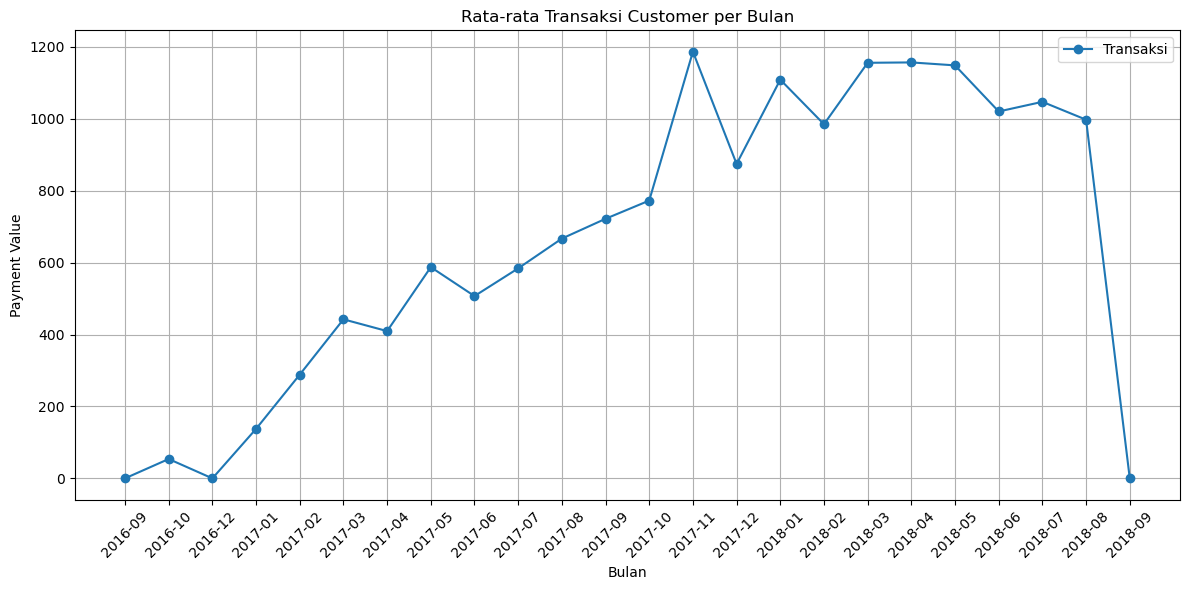

In [101]:
plt.figure(figsize=(12, 6))

# Mempersiapkan data frame dan mengkonversi sumbu Y dalam ribuan real
plt.plot(trx_monthly['order_monthly'], trx_monthly['payment_value'] / 1000, label='Transaksi', marker='o')

# Membuat line chart
plt.title('Rata-rata Transaksi Customer per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Payment Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan Line Chart
plt.show()

**Data Viz 2 (Bar Chart)**

2. Jenis produk apa yang sering dibeli customer? <span style="background-color:green">🚩</span>

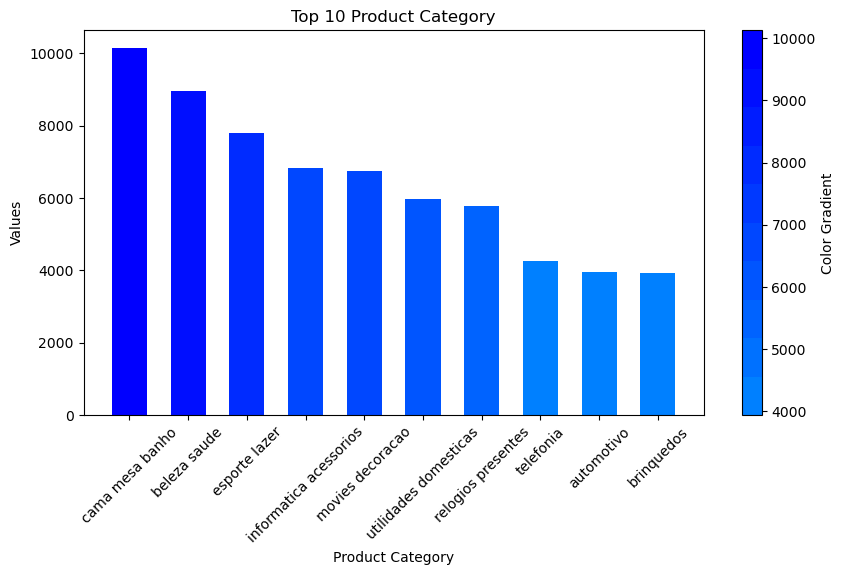

In [102]:
# Mempersiapkan data frame static
data = {'labels' : ['cama mesa banho', 'beleza saude', 'esporte lazer', 'informatica acessorios', 
                    'movies decoracao', 'utilidades domesticas', 'relogios presentes', 'telefonia', 
                    'automotivo', 'brinquedos'],
'values' : [10127, 8952, 7783, 6819, 6743, 5972, 5770, 4252, 3960, 3940]}

# Menyimpan keys dan value
tproduct = pd.DataFrame(data)

# Menentukan color gradient pada colormap
colors = [(0, 0.5, 1), (0, 0, 1)] 
colormap = LinearSegmentedColormap.from_list('custom', colors, N=len(data['values']))

# Menentukan value untuk keterangan colormap
normalize = plt.Normalize(min(tproduct['values']), max(tproduct['values']))

# Looping color pada bar chart berdasarkan color grradient yang telah ditentukan
colors = [colormap(normalize(value)) for value in tproduct['values']]

# Membuat Bar Chart
plt.figure(figsize=(10, 5))
tproduct['yval'] = tproduct['values']
plt.bar(tproduct['labels'], tproduct['yval'], color=colors, width=0.6)
plt.xlabel('Product Category')
plt.ylabel('Values')
plt.title('Top 10 Product Category')
plt.xticks(rotation=45)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Color Gradient')

# Tampilkan Bar Chart
plt.show()

**Data Viz 3 (Heatmap)** 

3. Apakah produk dengan rating yang lebih rendah (1-3) cenderung memiliki jumlah pesanan yang dibatalkan lebih tinggi? <span style="background-color:blue">🚩</span>

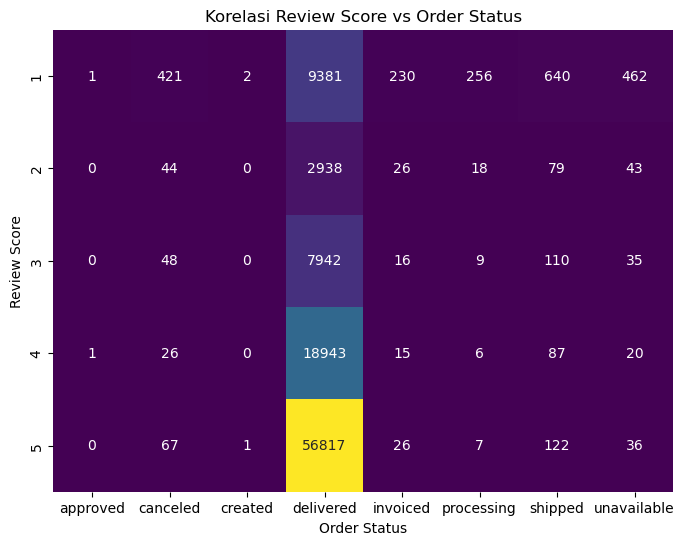

In [103]:
plt.figure(figsize=(8, 6))

# Mempersiapkan data frame
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=False)

# Membuat Heatmap
plt.title('Korelasi Review Score vs Order Status')
plt.xlabel('Order Status')
plt.ylabel('Review Score')

# Tampilkan Heatmap
plt.show()

## ⚫ **Conclusion**

1. Bagaimana tingkat nilai transaksi customer dari waktu ke waktu? <span style="background-color:yellow">🚩</span>
    > Dalam kurun waktu 22 bulan terakhir rata-rata transaksi customer perbulan cenderung mengalami peningkatan signifikan dan puncaknya pada bulan november 2017 sebesar R$ 1152607.07

2. Jenis produk apa yang sering dibeli customer? <span style="background-color:green">🚩</span>
    > Urutan pertama produk dibeli terbanyak dimulai dengan kategori produk cama mesa banho, lalu disusul beleza saude dan esporte lazer, kemudian diurutan ke-10 ditempati oleh brinquedos
    
3. Apakah produk dengan rating yang lebih rendah (1-3) cenderung memiliki jumlah pesanan yang dibatalkan lebih tinggi? <span style="background-color:blue">🚩</span>
    > Dari hasil nilai koefisien cramer 0.1647842241329194 menunjukan bahwa adanya hubungan yang lemah atau tidak kuat antar kolom dan baris.
    Namun bila dalam pengelompokan rating rendah (1-3) dan tinggi (4 & 5), rating rendah cenderung memiliki tingkat jumlah pesanan yang dibatalkan lebih tinggi yakni sebanyak 513 atau 84.8%